# Solve $\Phi$<sub>'tt</sub> = $\Phi$<sub>'xx</sub> + $\beta$$\Phi$

#### Solve on a periodic grid then solve on x is an element of [0,L] and impose no incoming boundary values at both sides ($\Phi(0)=\Phi(L)=0$). Then show convergence of the obtained solution.

In [1]:
using Plots

In [2]:
xstart = 0
xend = 10

N = 100

delta_x = (xend-xstart)/N

lambda = 0.1

delta_t = lambda*delta_x

beta = 1.0;

In [3]:
# Initial conditions
# phi,tt = phi,xx
# g = phi,t
# f = phi,x

# phi,t = g
# f,t = g,x
# g,t = f,x <- find this by plugging into the original equation 
function init(x::Float64)
    phi_initial = exp(-((x-5)^2)) - exp(-(5)^2)
    f_initial = exp(-((x-5)^2)) - exp(-(5)^2)
    g_initial = -2*(x-5)*exp(-((x-5)^2))
    return [phi_initial,g_initial,f_initial]
end

init (generic function with 1 method)

In [4]:
phi0 = zeros(N+1,1)
f0 = zeros(N+1,1)
g0 = zeros(N+1,1)

for i in 1:N+1
    phi0[i],g0[i],f0[i] = init(delta_x*(i-1))
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

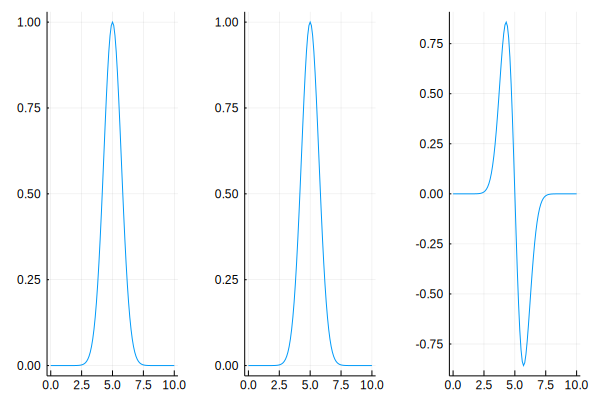

In [5]:
p1 = plot(x,phi0)
p2 = plot(x,f0)
p3 = plot(x,g0)
plot(p1,p2,p3,layout=(1,3),legend=false)

In [6]:
# Solid boundary contitions

function update(U0,f0,g0,dt::Float64,dx::Float64,B::Float64)
    
    n = length(U0)
    
    UN = zeros(n,1)
    fN = zeros(n,1)
    gN = zeros(n,1)
    
    UN[1] = 0
    fN[1] = 0
    gN[1] = g0[1]+ dt*(f0[2]-f0[1])/dx
    
    for i in 2:n-1
        
        # Forward Time Centered Space

        fN[i] = f0[i] + dt*(g0[i+1]-g0[i-1])/(2*dx) - dt*B^2*U0[i]
        gN[i] = g0[i] + dt*(f0[i+1]-f0[i-1])/(2*dx)
        UN[i] = U0[i] + dt*f0[i]

    end
    
    UN[n] = 0
    fN[n] = 0
    gN[n] = g0[n]+ dt*(f0[n]-f0[n-1])/dx
    
    return UN,fN,gN
    
end

update (generic function with 1 method)

In [7]:
phi0 = zeros(N+1,1)
f0 = zeros(N+1,1)
g0 = zeros(N+1,1)

for i in 1:N+1
    phi0[i],g0[i],f0[i] = init(delta_x*(i-1))
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

In [8]:
j = 0
p = Array{Any,2}(undef,10,2)

for i in 1:500

    phiN,fN,gN = update(phi0,f0,g0,delta_t,delta_x,beta)
    for j in 1:N+1
        phi0[j] = phiN[j]
        f0[j] = fN[j]
        g0[j] = gN[j]
    end
    
    if i%50 == 0
        j = j+1
        p[j] = plot(x,phi0)
    end
end

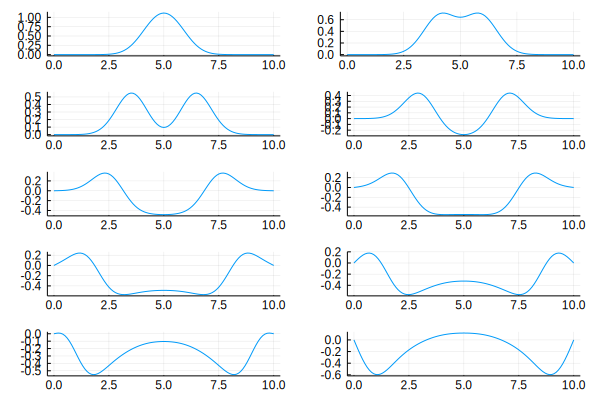

In [9]:
plot(p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],layout=(5,2),legend=false)

## Convergence

In [10]:
xstart = 0
xend = 10

N = 100
delta_x = (xend-xstart)/N

lambda = 0.1

delta_t1 = lambda*delta_x
delta_t2 = delta_t1/2
delta_t3 = delta_t2/2

T = 500

beta = 1.0;

In [11]:
phi0 = zeros(N+1,3)
f0 = zeros(N+1,3)
g0 = zeros(N+1,3)

for i in 1:N+1
            
    phi0[i,1],g0[i,1],f0[i,1] = init(delta_x*(i-1))
    phi0[i,2],g0[i,2],f0[i,2] = init(delta_x*(i-1))
    phi0[i,3],g0[i,3],f0[i,3] = init(delta_x*(i-1))
            
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

In [12]:
j = 0
p = Array{Any,2}(undef,10,2)

for i in 1:T

    phiN1,fN1,gN1 = update(phi0[:,1],f0[:,1],g0[:,1],delta_t1,delta_x,beta)

    for j in 1:N+1
        phi0[j,1] = phiN1[j]
        f0[j,1] = fN1[j]
        g0[j,1] = gN1[j]
    end
        
end

for i in 1:2*T

    phiN2,fN2,gN2 = update(phi0[:,2],f0[:,2],g0[:,2],delta_t2,delta_x,beta)

    for j in 1:N+1
        phi0[j,2] = phiN2[j]
        f0[j,2] = fN2[j]
        g0[j,2] = gN2[j]
    end
        
end

for i in 1:4*T

    phiN3,fN3,gN3 = update(phi0[:,3],f0[:,3],g0[:,3],delta_t3,delta_x,beta)

    for j in 1:N+1
        phi0[j,3] = phiN3[j]
        f0[j,3] = fN3[j]
        g0[j,3] = gN3[j]
    end
        
end

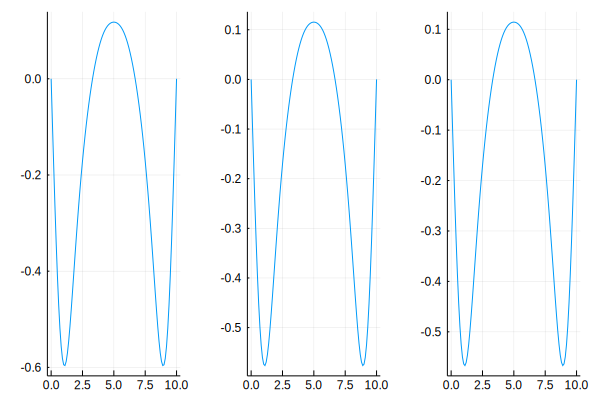

In [13]:
p1 = plot(x,phi0[:,1])
p2 = plot(x,phi0[:,2])
p3 = plot(x,phi0[:,3])
plot(p1,p2,p3,layout=(1,3),legend=false)

In [14]:
L1 = sqrt((sum(phi0[:,1]-phi0[:,2]))^2/N)
L2 = sqrt((sum(phi0[:,2]-phi0[:,3]))^2/N)

L1/L2

2.0448527166520787

In [15]:
function convergence(udate,lambda,T)
    
    xstart = 0
    xend = 10

    N = 100
    delta_x = (xend-xstart)/N

    delta_t1 = lambda*delta_x
    delta_t2 = delta_t1/2
    delta_t3 = delta_t2/2

    beta = 1.0;
   
    phi0 = zeros(N+1,3)
    f0 = zeros(N+1,3)
    g0 = zeros(N+1,3)

    for i in 1:N+1
            
        phi0[i,1],g0[i,1],f0[i,1] = init(delta_x*(i-1))
        phi0[i,2],g0[i,2],f0[i,2] = init(delta_x*(i-1))
        phi0[i,3],g0[i,3],f0[i,3] = init(delta_x*(i-1))
    
    end

    for i in 1:T

        phiN1,fN1,gN1 = udate(phi0[1:N+1,1],f0[1:N+1,1],g0[1:N+1,1],delta_t1,delta_x,beta)

        for j in 1:N+1
            phi0[j,1] = phiN1[j]
            f0[j,1] = fN1[j]
            g0[j,1] = gN1[j]
        end
        
    end

    for i in 1:2*T

        phiN2,fN2,gN2 = udate(phi0[1:N+1,2],f0[1:N+1,2],g0[1:N+1,2],delta_t2,delta_x,beta)

        for j in 1:N+1
            phi0[j,2] = phiN2[j]
            f0[j,2] = fN2[j]
            g0[j,2] = gN2[j]
        end
        
    end

    for i in 1:4*T

        phiN3,fN3,gN3 = udate(phi0[1:N+1,3],f0[1:N+1,3],g0[1:N+1,3],delta_t3,delta_x,beta)

        for j in 1:N+1
            phi0[j,3] = phiN3[j]
            f0[j,3] = fN3[j]
            g0[j,3] = gN3[j]
        end
        
    end

    L1 = sqrt((sum(phi0[:,1]-phi0[:,2]))^2/N)
    L2 = sqrt((sum(phi0[:,2]-phi0[:,3]))^2/N)

    converge = L1/L2
    
    conv = log2(converge)
    
    return conv
    
end
    

convergence (generic function with 1 method)

In [16]:
lambda = zeros(1000,1)
cnvg = zeros(1000,1)

for i in 1:1000
    lambda[i] = 0.005*i
    cnvg[i] = convergence(update,lambda[i],1000)
end

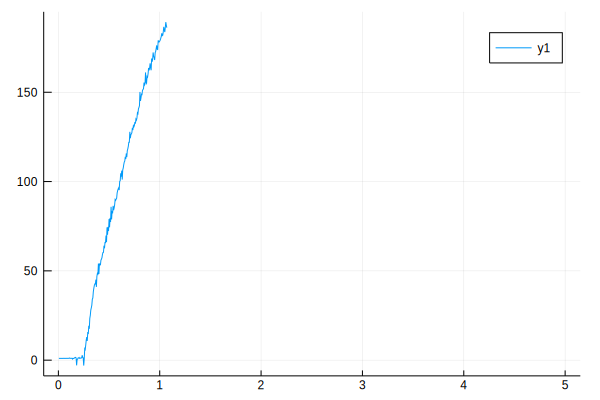

In [17]:
plot(lambda,cnvg)

In [18]:
lambda = zeros(100,1)
T = zeros(100,1)
cnvg = zeros(100,1)

for i in 1:100
    lambda[i] = 0.005
    T[i] = 1000*i
    cnvg[i] = convergence(update,lambda[i],T[i])
end

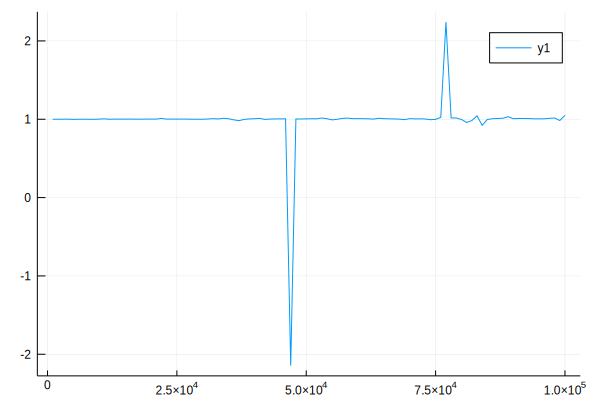

In [19]:
plot(T,cnvg)

## Runge-Kutta

In [62]:
function F_g(f,dx)
    
    N = size(f)[1]
    f_new = zeros(N,1)
    
    for i in 2:N-1
        f_new[i] = (f[i+1] - f[i-1])/(2*dx)
    end
    
    f_new[1] = f[1]
    f_new[N] = f[N]
    
    return f_new
end

F_g (generic function with 2 methods)

In [63]:
function F_f(g,beta,phi,dx)
        
    N = size(g)[1]
    g_new = zeros(N,1)
    
    for i in 2:N-1
        g_new[i] = (g[i+1] - g[i-1])/(2*dx) - (beta^2)*phi[i]
    end
    
    g_new[1] = g[1]
    g_new[N] = g[N]
    
    return g_new
   
end

F_f (generic function with 1 method)

In [151]:
# Solid boundary contitions

function updateRK(U0,f0,g0,dt::Float64,dx::Float64,B::Float64)
    
    n = size(U0)[1]
    
    UN = zeros(n,1)
    fN = zeros(n,1)
    gN = zeros(n,1)
    
    UN[1] = 0
    fN[1] = 0
    gN[1] = g0[1]+ dt*(f0[2]-f0[1])/dx
    
    k1_f = (g0[3] - g0[1])/(2*dx)
    k1_g = (f0[3] - f0[1])/(2*dx) - (B^2)*U0[2]
    k1_U = f0[2]
    
    fN[2] = f0[2] + dt*k1_f
    gN[2] = g0[2] + dt*k1_g
    UN[2] = U0[2] + dt*k1_U
    
    k1_f = (g0[4] - g0[2])/(2*dx)
    k2_f = ((g0[4]-g0[2])+(dt/(4*dx))*(g0[5]-2*g0[3]+g0[1]))/(2*dx)
    
    k1_g = (f0[4] - f0[2])/(2*dx) - (B^2)*U0[3]
    k2_g = ((f0[4]-f0[2])+(dt/(4*dx))+(f0[5]-2*f0[3]+f0[1]))/(2*dx)+(dt*(B^2)/(4*dx))*(U0[2]-U0[4])
    
    k1_U = f0[3]
    k2_U = f0[3] + (dt/2)f0[3]
    
    fN[3] = f0[3] + dt*k2_f
    gN[3] = g0[3] + dt*k2_g
    UN[3] = U0[3] + dt*k2_U
    
    for i in 4:N-3
        
        k1_f = (g0[i+1] - g0[i-1])/(2*dx)
        k2_f = ((g0[i+1]-g0[i-1])+(dt/(4*dx))*(g0[i+2]-2*g0[i]+g0[i-2]))/(2*dx)
        k3_f = ((g0[i+1]-g0[i-1])/(2*dx)) + ((dt/(4*dx^2))*(g0[i+2]-2*g0[i]+g0[i-2])) + ((dt^2)/(8*dx^3))*(g0[i+3]-3*g0[i+1]+3*g0[i-1]-g0[i-3])
        fN[i] = f0[i] + (dt/6)*(k1_f + (4*k2_f) + k3_f)
            
        k1_g = (f0[i+1] - f0[i-1])/(2*dx) - (B^2)*U0[i]
        k2_g = ((f0[i+1]-f0[i-1])+(dt/(4*dx))+(f0[i+2]-2*f0[i]+f0[i-2]))/(2*dx)+(dt*(B^2)/(4*dx))*(U0[i-1]-U0[i+1])
        k3_g = ((f0[i+1]-f0[i-1])/(2*dx)) + ((dt/(4*dx^2))*(f0[i+2]-2*f0[i]+f0[i-2])) + ((dt^2)/(8*dx^3))*(f0[i+3]-3*f0[i+1]+3*f0[i-1]-f0[i-3])+ ((dt^2)*(B^2)/(4*dx^2))*(2U0[i]-U0[i+2]-U0[i-2])+((dt^2)*(B^2)/(2*dx))*(U0[i-1]-U0[i+1])-2*dt*(B^2)U0[i]                                                                        
        gN[i] = g0[i] + (dt/6)*(k1_g + (4*k2_g) + k3_g)
                
        k1_U = f0[i]
        k2_U = f0[i] + (dt/2)f0[i]
        k3_U = f0[i] + dt*f0[i]
        UN[i] = U0[i] + (dt/6)*(k1_U + (4*k2_U) + k3_U)
        
    end
    
    k1_f = (g0[n-1] - g0[n-3])/(2*dx)
    k2_f = ((g0[n-1]-g0[n-3])+(dt/(4*dx))*(g0[n]-2*g0[n-2]+g0[n-4]))/(2*dx)
    
    k1_g = (f0[n-1] - f0[n-3])/(2*dx) - (B^2)*U0[n-2]
    k2_g = ((f0[n-1]-f0[n-3])+(dt/(4*dx))+(f0[n]-2*f0[n-2]+f0[n-4]))/(2*dx)+(dt*(B^2)/(4*dx))*(U0[n-3]-U0[n-1])
    
    k1_U = f0[n-2]
    k2_U = f0[n-2] + (dt/2)f0[n-2]
    
    fN[n-2] = f0[n-2] + dt*k2_f
    gN[n-2] = g0[n-2] + dt*k2_g
    UN[n-2] = U0[n-2] + dt*k2_U
    
    k1_f = (g0[n] - g0[n-2])/(2*dx)
    k1_g = (f0[n] - f0[n-2])/(2*dx) - (B^2)*U0[n-1]
    k1_U = f0[n-1]
    
    fN[n-1] = f0[n-1] + dt*k1_f
    gN[n-1] = g0[n-1] + dt*k1_g
    UN[n-1] = U0[n-1] + dt*k1_U
    
    UN[n] = 0
    fN[n] = 0
    gN[n] = g0[n]+ dt*(f0[n]-f0[n-1])/dx
    
    return UN,fN,gN
    
end

updateRK (generic function with 1 method)

In [152]:
phi0 = zeros(N+1,1)
f0 = zeros(N+1,1)
g0 = zeros(N+1,1)

for i in 1:N+1
            
    phi0[i,1],g0[i,1],f0[i,1] = init(delta_x*(i-1))
            
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

In [160]:
j = 0
p = Array{Any,2}(undef,10,2)

for i in 1:100

    phiN,fN,gN = updateRK(phi0,f0,g0,delta_t,delta_x,beta)
    for j in 1:N+1
        phi0[j] = phiN[j]
        f0[j] = fN[j]
        g0[j] = gN[j]
    end
    
    if i%10 == 0
        j = j+1
        p[j] = plot(x,phi0)
    end
end

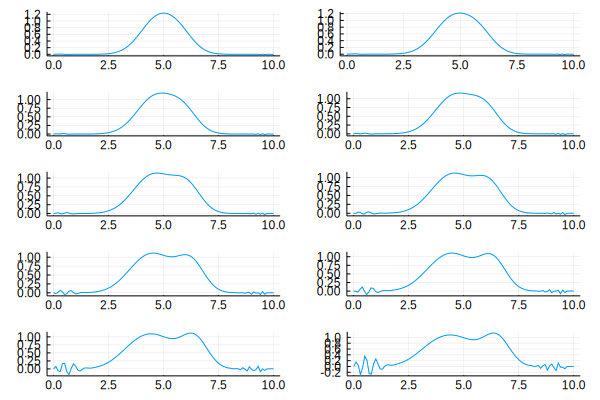

In [161]:
plot(p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],layout=(5,2),legend=false)

In [162]:
# Solid boundary contitions

function updateRK2(U0,f0,g0,dt::Float64,dx::Float64,B::Float64)
    
    n = size(U0)[1]
    
    UN = zeros(n,1)
    fN = zeros(n,1)
    gN = zeros(n,1)
    
    UN[1] = 0
    fN[1] = 0
    gN[1] = g0[1]+ dt*(f0[2]-f0[1])/dx
    
    k1_f = zeros(n,1)
    k2_f = zeros(n,1)
    k3_f = zeros(n,1)
 
    f1 = zeros(n,1)
    f2 = zeros(n,1)
    
    k1_g = zeros(n,1)
    k2_g = zeros(n,1)
    k3_g = zeros(n,1)
    
    g1 = zeros(n,1)
    g2 = zeros(n,1)
    
    k1_U = zeros(n,1)
    k2_U = zeros(n,1)
    k3_U = zeros(n,1)
    
    U1 = zeros(n,1)
    U2 = zeros(n,1)
    
    for i in 2:n-1
        
        k1_f[i] = (g0[i+1] - g0[i-1])/(2*dx)
        k1_g[i] = (f0[i+1] - f0[i-1])/(2*dx) - (B^2)*U0[i]
        k1_U[i] = f0[i]
        
        f1[i] = f0[i] + dt*k1_f[i]
        g1[i] = g0[i] + dt*k1_g[i]
        U1[i] = U0[i] + dt*k1_U[i]
        
    end
    
    for i in 4:n-3
        
        k2_f[i] = ((g1[i+1]-g1[i-1])+(dt/(4*dx))*(g1[i+2]-2*g1[i]+g1[i-2]))/(2*dx)
        k2_g[i] = ((f1[i+1]-f1[i-1])+(dt/(4*dx))+(f1[i+2]-2*f1[i]+f1[i-2]))/(2*dx)+(dt*(B^2)/(4*dx))*(U1[i-1]-U1[i+1])
        k2_U[i] = f1[i] + (dt/2)f1[i]
        
        f2[i] = f1[i] + dt*k2_f[i]
        g2[i] = g1[i] + dt*k2_g[i]
        U2[i] = U1[i] + dt*k2_U[i]
        
    end
    
    for i in 7:n-6
        k3_f[i] = ((g2[i+1]-g2[i-1])/(2*dx)) + ((dt/(4*dx^2))*(g2[i+2]-2*g2[i]+g2[i-2])) + ((dt^2)/(8*dx^3))*(g2[i+3]-3*g2[i+1]+3*g2[i-1]-g2[i-3])
        fN[i] = f0[i] + (dt/6)*(k1_f[i] + (4*k2_f[i]) + k3_f[i])
        
        k3_g[i] = ((f2[i+1]-f2[i-1])/(2*dx)) + ((dt/(4*dx^2))*(f2[i+2]-2*f2[i]+f2[i-2])) + ((dt^2)/(8*dx^3))*(f2[i+3]-3*f2[i+1]+3*f2[i-1]-f2[i-3])+ ((dt^2)*(B^2)/(4*dx^2))*(2U2[i]-U2[i+2]-U2[i-2])+((dt^2)*(B^2)/(2*dx))*(U2[i-1]-U2[i+1])-2*dt*(B^2)U2[i]                                                                        
        gN[i] = g0[i] + (dt/6)*(k1_g[i] + (4*k2_g[i]) + k3_g[i])
        
        k3_U[i] = f2[i] + dt*f2[i]
        UN[i] = U0[i] + (dt/6)*(k1_U[i] + (4*k2_U[i]) + k3_U[i])
    end

    for i in 4:6
        fN[i] = f2[i]
        gN[i] = g2[i]
        UN[i] = U2[i]
    end
    
    for i in n-5:n-3
        fN[i] = f2[i]
        gN[i] = g2[i]
        UN[i] = U2[i]
    end
    
    for i in 2:3
        fN[i] = f1[i]
        gN[i] = g1[i]
        UN[i] = U1[i]
    end
    
    for i in n-2:n-1
        fN[i] = f1[i]
        gN[i] = g1[i]
        UN[i] = U1[i]
    end
    
    UN[n] = 0
    fN[n] = 0
    gN[n] = g0[n]+ dt*(f0[n]-f0[n-1])/dx
    
    return UN,fN,gN
    
end

updateRK2 (generic function with 1 method)

In [163]:
phi0 = zeros(N+1,1)
f0 = zeros(N+1,1)
g0 = zeros(N+1,1)

for i in 1:N+1
            
    phi0[i,1],g0[i,1],f0[i,1] = init(delta_x*(i-1))
            
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

In [167]:
j = 0
p = Array{Any,2}(undef,10,2)

for i in 1:100

    phiN,fN,gN = updateRK2(phi0,f0,g0,delta_t,delta_x,beta)
    for j in 1:N+1
        phi0[j] = phiN[j]
        f0[j] = fN[j]
        g0[j] = gN[j]
    end
    
    if i%10 == 0
        j = j+1
        p[j] = plot(x,phi0)
    end
end

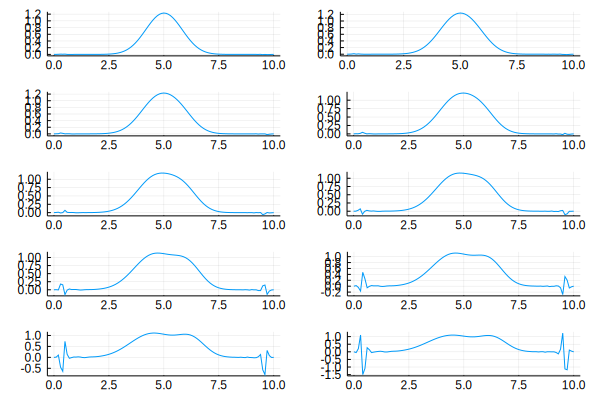

In [168]:
plot(p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],layout=(5,2),legend=false)